In [1]:
import os
os.chdir('../')

import DeepPurpose.property_pred as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *

from sklearn.metrics import mean_squared_error, roc_auc_score, average_precision_score, f1_score


In [64]:
def run_Morgan(fold_n, balanced):
    
    train = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/train.csv')
    dev = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/dev.csv')
    test = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/test.csv')
    
    if balanced:
        # oversample balanced training
        train = pd.concat([train[train.activity == 1].sample(n = len(train[train.activity == 0]), replace=True), train[train.activity == 0]]).sample(frac = 1).reset_index(drop = True)
    
    X_train = train.smiles.values
    y_train = train.activity.values
    X_dev = dev.smiles.values
    y_dev = dev.activity.values
    X_test = test.smiles.values
    y_test = test.activity.values
    
    drug_encoding = 'Morgan'
    train = data_process(X_drug = X_train, y = y_train, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    val = data_process(X_drug = X_dev, y = y_dev, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    test = data_process(X_drug = X_test, y = y_test, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)
    
    config = generate_config(drug_encoding = drug_encoding, 
                         cls_hidden_dims = [512], 
                         train_epoch = 10, 
                         LR = 0.0001, 
                         batch_size = 256
                        )
    
    model = models.model_initialize(**config)
    model.train(train, val, test)
    
    scores = model.predict(test)
    
    return roc_auc_score(test.Label.values, scores), average_precision_score(test.Label.values, scores), scores, test.Label.values

Drug Property Prediction Mode...
in total: 3330 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69260. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.89627 , AUPRC: 0.70668 , F1: 0.66666
Training at Epoch 2 iteration 0 with loss 0.67887. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.87272 , AUPRC: 0.63954 , F1: 0.60869
Training at Epoch 3 iteration 0 with loss 0.62554. Total time 0.00055 hours
Validation at Epoch 3 , AUROC: 

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 2 , AUROC: 0.72474 , AUPRC: 0.07426 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.63924. Total time 0.00055 hours
Validation at Epoch 3 , AUROC: 0.69191 , AUPRC: 0.05357 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.50505. Total time 0.00083 hours
Validation at Epoch 4 , AUROC: 0.65530 , AUPRC: 0.04334 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.25314. Total time 0.00111 hours
Validation at Epoch 5 , AUROC: 0.60353 , AUPRC: 0.03475 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.06097. Total time 0.00138 hours
Validation at Epoch 6 , AUROC: 0.55555 , AUPRC: 0.03306 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.01442. Total time 0.00166 hours
Validation at Epoch 7 , AUROC: 0.52651 , AUPRC: 0.03763 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00662. Total time 0.00194 hours
Validation at Epoch 8 , AUROC: 0.52904 , AUPRC: 0.03632 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.00250. Total time 0.00222 hours
Valida

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing AUROC: 0.5984848484848485 , AUPRC: 0.05483324043106652 , F1: 0.0
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3312 drugs
encoding drug...
unique drugs: 1695
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69745. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.89562 , AUPRC: 0.44523 , F1: 0.03314
Training at Epoch 2 iteration 0 with loss 0.68396. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.85690 , AUPRC: 0.38425 , F1: 0.

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 1 , AUROC: 0.21989 , AUPRC: 0.01099 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.67935. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.28102 , AUPRC: 0.01187 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.63832. Total time 0.00055 hours
Validation at Epoch 3 , AUROC: 0.31751 , AUPRC: 0.01252 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.51902. Total time 0.00083 hours
Validation at Epoch 4 , AUROC: 0.35218 , AUPRC: 0.01326 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.24404. Total time 0.00111 hours
Validation at Epoch 5 , AUROC: 0.39233 , AUPRC: 0.01437 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.04885. Total time 0.00138 hours
Validation at Epoch 6 , AUROC: 0.43156 , AUPRC: 0.01566 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.00890. Total time 0.00138 hours
Validation at Epoch 7 , AUROC: 0.44343 , AUPRC: 0.01604 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.01218. Total time 0.00166 hours
Valida

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 1 , AUROC: 0.37681 , AUPRC: 0.00769 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.68122. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.42028 , AUPRC: 0.00826 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.64051. Total time 0.00027 hours
Validation at Epoch 3 , AUROC: 0.44927 , AUPRC: 0.00869 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.50562. Total time 0.00055 hours
Validation at Epoch 4 , AUROC: 0.41545 , AUPRC: 0.00819 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.23183. Total time 0.00083 hours
Validation at Epoch 5 , AUROC: 0.41062 , AUPRC: 0.00813 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.03374. Total time 0.00111 hours
Validation at Epoch 6 , AUROC: 0.44927 , AUPRC: 0.00869 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.02935. Total time 0.00138 hours
Validation at Epoch 7 , AUROC: 0.45893 , AUPRC: 0.00884 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00489. Total time 0.00166 hours
Valida

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing AUROC: 0.4014598540145985 , AUPRC: 0.01436329226242399 , F1: 0.0
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3290 drugs
encoding drug...
unique drugs: 1688
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 208 drugs
encoding drug...
unique drugs: 208
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69326. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 1.0 , AUPRC: 1.0 , F1: 0.61538
Training at Epoch 2 iteration 0 with loss 0.68281. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 1.0 , AUPRC: 1.0 , F1: 0.88888
Training a

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing AUROC: 0.5314009661835748 , AUPRC: 0.01020408163265306 , F1: 0.0
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3306 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69290. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.93132 , AUPRC: 0.16458 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.68537. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.90619 , AUPRC: 0.12702 , F1: 0.2222

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 6 , AUROC: 0.66499 , AUPRC: 0.18299 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.01413. Total time 0.00166 hours
Validation at Epoch 7 , AUROC: 0.65661 , AUPRC: 0.18260 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00739. Total time 0.00194 hours
Validation at Epoch 8 , AUROC: 0.66834 , AUPRC: 0.18307 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.00403. Total time 0.00222 hours
Validation at Epoch 9 , AUROC: 0.63149 , AUPRC: 0.08176 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00315. Total time 0.0025 hours
Validation at Epoch 10 , AUROC: 0.65159 , AUPRC: 0.18235 , F1: 0.0
--- Go for Testing ---
Testing AUROC: 1.0 , AUPRC: 1.0 , F1: 0.8571428571428571
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3308 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding dr

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing AUROC: 0.7219430485762144 , AUPRC: 0.3526698350573106 , F1: 0.0
--- Training Finished ---
predicting...
ROC-Mean 0.6795
ROC-STD 0.2009
PRC-Mean 0.3927
PRC-STD 0.3323


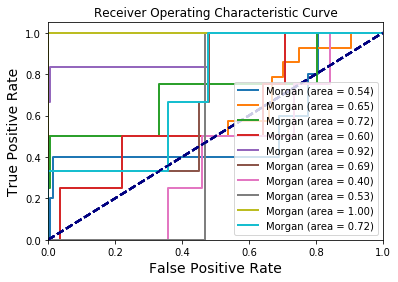

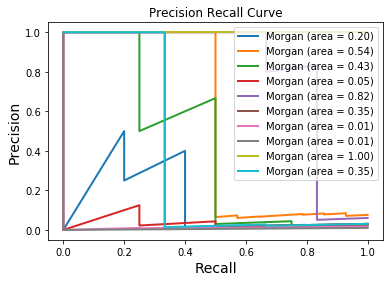

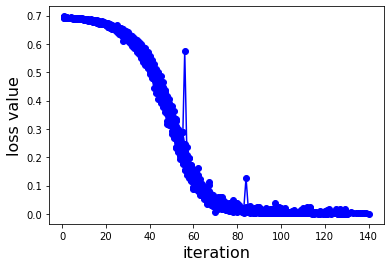

In [85]:
roc_ = []
prc_ = []
scores_ = []
labels_ = []
for i in range(10):
    roc, prc, scores, labels = run_Morgan(i, True)
    roc_.append(roc)
    prc_.append(prc)
    scores_.append(scores)
    labels_.append(labels)
    
print('ROC-Mean {:.4f}'.format(np.mean(np.array(roc_))))
print('ROC-STD {:.4f}'.format(np.std(np.array(roc_))))
print('PRC-Mean {:.4f}'.format(np.mean(np.array(prc_))))
print('PRC-STD {:.4f}'.format(np.std(np.array(prc_))))

with open('./scores_aicures/morgan_score.pkl', 'wb') as f:
    pickle.dump(scores_, f, pickle.HIGHEST_PROTOCOL)


In [87]:
def run_Daylight(fold_n, balanced):
    
    train = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/train.csv')
    dev = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/dev.csv')
    test = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/test.csv')
    
    if balanced:
        # oversample balanced training
        train = pd.concat([train[train.activity == 1].sample(n = len(train[train.activity == 0]), replace=True), train[train.activity == 0]]).sample(frac = 1).reset_index(drop = True)
    
    X_train = train.smiles.values
    y_train = train.activity.values
    X_dev = dev.smiles.values
    y_dev = dev.activity.values
    X_test = test.smiles.values
    y_test = test.activity.values
    
    drug_encoding = 'Daylight'
    train = data_process(X_drug = X_train, y = y_train, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    val = data_process(X_drug = X_dev, y = y_dev, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    test = data_process(X_drug = X_test, y = y_test, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)
    
    config = generate_config(drug_encoding = drug_encoding, 
                         cls_hidden_dims = [512], 
                         train_epoch = 10, 
                         LR = 0.0001, 
                         batch_size = 256
                        )
    
    model = models.model_initialize(**config)
    model.train(train, val, test)
    
    scores = model.predict(test)
    
    return roc_auc_score(test.Label.values, scores), average_precision_score(test.Label.values, scores), scores, test.Label.values

Drug Property Prediction Mode...
in total: 3330 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69381. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.91983 , AUPRC: 0.77238 , F1: 0.13145
Training at Epoch 2 iteration 0 with loss 0.62907. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.92667 , AUPRC: 0.76797 , F1: 0.25742
Training at Epoch 3 iteration 0 with loss 0.53983. Total time 0.00055 hours
Validation at Epoch 3 , AUROC: 

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 4 , AUROC: 0.49242 , AUPRC: 0.02380 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.15461. Total time 0.00138 hours
Validation at Epoch 5 , AUROC: 0.57575 , AUPRC: 0.03256 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.04909. Total time 0.00166 hours
Validation at Epoch 6 , AUROC: 0.33712 , AUPRC: 0.01852 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.01886. Total time 0.00222 hours
Validation at Epoch 7 , AUROC: 0.35858 , AUPRC: 0.01904 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.01198. Total time 0.0025 hours
Validation at Epoch 8 , AUROC: 0.38383 , AUPRC: 0.02014 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.01182. Total time 0.00277 hours
Validation at Epoch 9 , AUROC: 0.41540 , AUPRC: 0.02163 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00688. Total time 0.00305 hours
Validation at Epoch 10 , AUROC: 0.34848 , AUPRC: 0.01846 , F1: 0.0
--- Go for Testing ---
Testing AUROC: 0.7868020304568528 , AUPRC: 0.3706447963800

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3312 drugs
encoding drug...
unique drugs: 1695
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69304. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.75589 , AUPRC: 0.45138 , F1: 0.03007
Training at Epoch 2 iteration 0 with loss 0.62729. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.69191 , AUPRC: 0.41299 , F1: 0.05970
Training at Epoch 3 iteration 0 with loss 0.50961. Total time 0.000

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 3 , AUROC: 0.50912 , AUPRC: 0.03072 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.27916. Total time 0.00083 hours
Validation at Epoch 4 , AUROC: 0.53056 , AUPRC: 0.03031 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.10095. Total time 0.00111 hours
Validation at Epoch 5 , AUROC: 0.55611 , AUPRC: 0.03274 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.04745. Total time 0.00138 hours
Validation at Epoch 6 , AUROC: 0.55520 , AUPRC: 0.03252 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.01283. Total time 0.00194 hours
Validation at Epoch 7 , AUROC: 0.52965 , AUPRC: 0.03138 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00468. Total time 0.00222 hours
Validation at Epoch 8 , AUROC: 0.52417 , AUPRC: 0.03166 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.00505. Total time 0.0025 hours
Validation at Epoch 9 , AUROC: 0.51505 , AUPRC: 0.03195 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00263. Total time 0.00277 hours
Valida

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 3 , AUROC: 0.55555 , AUPRC: 0.01075 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.26518. Total time 0.00083 hours
Validation at Epoch 4 , AUROC: 0.58454 , AUPRC: 0.01149 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.08297. Total time 0.00111 hours
Validation at Epoch 5 , AUROC: 0.46376 , AUPRC: 0.00892 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.03748. Total time 0.00138 hours
Validation at Epoch 6 , AUROC: 0.42995 , AUPRC: 0.00840 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.00888. Total time 0.00166 hours
Validation at Epoch 7 , AUROC: 0.42995 , AUPRC: 0.00840 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.03798. Total time 0.00194 hours
Validation at Epoch 8 , AUROC: 0.42512 , AUPRC: 0.00833 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.03120. Total time 0.0025 hours
Validation at Epoch 9 , AUROC: 0.39613 , AUPRC: 0.00793 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00565. Total time 0.00277 hours
Valida

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing AUROC: 0.35748792270531404 , AUPRC: 0.007462686567164179 , F1: 0.0
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3306 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69362. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.91289 , AUPRC: 0.10004 , F1: 0.03726
Training at Epoch 2 iteration 0 with loss 0.65202. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.94472 , AUPRC: 0.44189 , F1: 

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 9 , AUROC: 0.53768 , AUPRC: 0.12375 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00907. Total time 0.00277 hours
Validation at Epoch 10 , AUROC: 0.54271 , AUPRC: 0.17947 , F1: 0.0
--- Go for Testing ---
Testing AUROC: 0.8730964467005076 , AUPRC: 0.7596153846153846 , F1: 0.8571428571428571
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3308 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 wit

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing AUROC: 0.6566164154103852 , AUPRC: 0.3634891722323416 , F1: 0.0
--- Training Finished ---
predicting...
ROC-Mean 0.6686
ROC-STD 0.1728
PRC-Mean 0.3845
PRC-STD 0.2901


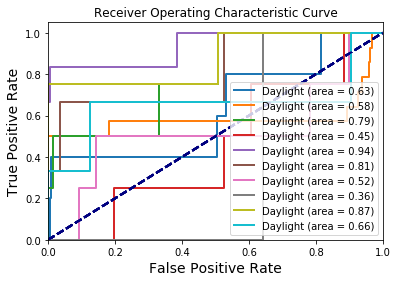

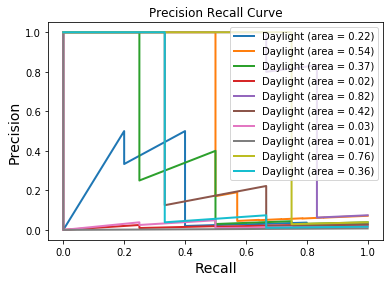

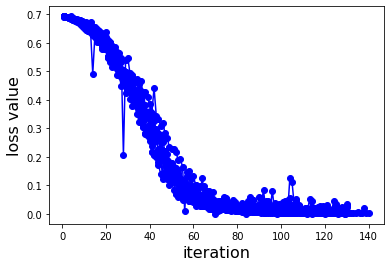

In [88]:
roc_ = []
prc_ = []
scores_ = []
labels_ = []

drug_encoding = 'Daylight'

for i in range(10):
    roc, prc, scores, labels = eval('run_' + drug_encoding + '(i, True)')
    roc_.append(roc)
    prc_.append(prc)
    scores_.append(scores)
    labels_.append(labels)
    
print('ROC-Mean {:.4f}'.format(np.mean(np.array(roc_))))
print('ROC-STD {:.4f}'.format(np.std(np.array(roc_))))
print('PRC-Mean {:.4f}'.format(np.mean(np.array(prc_))))
print('PRC-STD {:.4f}'.format(np.std(np.array(prc_))))

with open('./scores_aicures/' + drug_encoding + '_score.pkl', 'wb') as f:
    pickle.dump(scores_, f, pickle.HIGHEST_PROTOCOL)


In [2]:
def run_MPNN(fold_n, balanced):
    
    train = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/train.csv')
    dev = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/dev.csv')
    test = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/test.csv')
    
    if balanced:
        # oversample balanced training
        train = pd.concat([train[train.activity == 1].sample(n = len(train[train.activity == 0]), replace=True), train[train.activity == 0]]).sample(frac = 1).reset_index(drop = True)
    
    X_train = train.smiles.values
    y_train = train.activity.values
    X_dev = dev.smiles.values
    y_dev = dev.activity.values
    X_test = test.smiles.values
    y_test = test.activity.values
    
    drug_encoding = 'MPNN'
    train = data_process(X_drug = X_train, y = y_train, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    val = data_process(X_drug = X_dev, y = y_dev, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    test = data_process(X_drug = X_test, y = y_test, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)
    
    config = generate_config(drug_encoding = drug_encoding, 
                         cls_hidden_dims = [512], 
                         train_epoch = 10, 
                         LR = 0.001, 
                         batch_size = 128,
                         hidden_dim_drug = 128,
                         mpnn_hidden_size = 128,
                         mpnn_depth = 3 
                        )
    
    model = models.model_initialize(**config)
    model.train(train, val, test)
    
    scores = model.predict(test)
    
    return roc_auc_score(test.Label.values, scores), average_precision_score(test.Label.values, scores), scores, test.Label.values

In [3]:
roc_ = []
prc_ = []
scores_ = []
labels_ = []

drug_encoding = 'MPNN'

for i in range(10):
    roc, prc, scores, labels = eval('run_' + drug_encoding + '(i, True)')
    roc_.append(roc)
    prc_.append(prc)
    scores_.append(scores)
    labels_.append(labels)
    
print('ROC-Mean {:.4f}'.format(np.mean(np.array(roc_))))
print('ROC-STD {:.4f}'.format(np.std(np.array(roc_))))
print('PRC-Mean {:.4f}'.format(np.mean(np.array(prc_))))
print('PRC-STD {:.4f}'.format(np.std(np.array(prc_))))

with open('./scores_aicures/' + drug_encoding + '_score.pkl', 'wb') as f:
    pickle.dump(scores_, f, pickle.HIGHEST_PROTOCOL)


Drug Property Prediction Mode...
in total: 3330 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
len(x) is  128
len(x[0]) is  2
len(x[1]) is  2
len(x[2]) is  2
len(mpnn_feature) 128 len(mpnn_feature[0]) 5


IndexError: tuple index out of range